#FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
df.shape
#gives the shape of the dataframe i.e rows and coloumns

(1898, 9)

#### Observations:
There are 1898 rows and 9 coloumns in the dataset.

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()
df.dtypes#this can also be used to find the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:
a)order_id: is of the integer datatype.
b)customer_id: is of the integer datatype
c)restaurant_name:is of the string/object data type.
d)cuisine_type:is of the string/object data type.
e)cost_of_the_order:is of the float data type.
f)day_of_the_week:is of the string/object data type.
g)food_preparation_time:is of the integer data type.
h)delivery_time:is of the integer data type.

In [ ]:
df['rating'].unique()#to find the unique values in the rating coloumn


array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#treating the data
#replace 'Not give' value by -1 in rating coloumn and change the data type to int
df = df.replace('Not given', -1, regex=True)
df['rating'] = df['rating'].astype(int)
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                     int64
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:
There are three unique data values for rating and its object datatype because of 'Not given' value. But the rating should be in integer data type hence replacing Not given by -1 and converting the data type to integer.

In [ ]:
df.describe().T
print(df['food_preparation_time'].min())#to find the minimum value in the dataframe
print(df['food_preparation_time'].max())#to find the maximum value in the dataframe
print(df['food_preparation_time'].mean())#to find the average value of the dataframe

20
35
27.371970495258168


#### Observations:
The minimum time taken to prepare the food is 20.00 minutes
The maximum time taken to prepare the food is 35.00 minutes
The average time taken to prepare the food is  27.371970495258168 minutes

In [ ]:
df['rating'].value_counts()#to find the value of not rated orders

-1    736
 5    588
 4    386
 3    188
Name: rating, dtype: int64

In [ ]:
df.loc[df['rating']==-1]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,-1,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,-1,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,-1,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,-1,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,-1,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,-1,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,-1,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,-1,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,-1,31,24


#### Observations:
There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

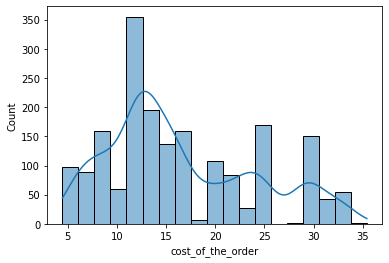

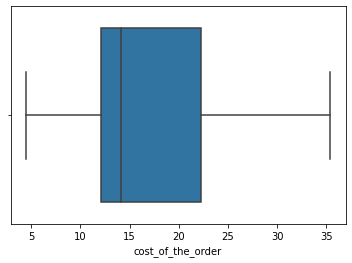

4.47

In [ ]:
#graph of cost_of_the_order
sns.histplot(data=df,x='cost_of_the_order',kde='True')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()
df['cost_of_the_order'].min()

Observations:
The cost of the order does not have any outliers.
The average cost of the order lies between 10 and 15.
The maximum cost of the order is around 35.
The minimum cost of the order is around 4.
The 25% of the cost of the order is 12
The 50% of the order cost around  14
The 75% of the order cost around 22

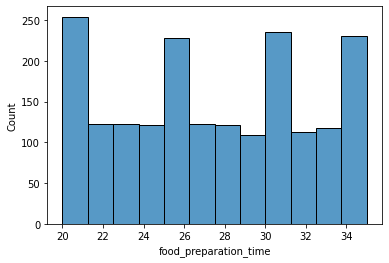

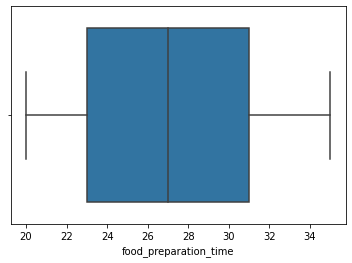

In [ ]:
#graph of food_preparation_time
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observations:
The minimum time taken to prepare the food is 20.00 The maximum time taken to prepare the food is 35.00 The average time taken to prepare the food is 27.371970495258168 
Most of the order's food preparation time is around 20

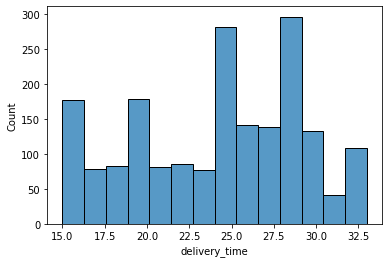

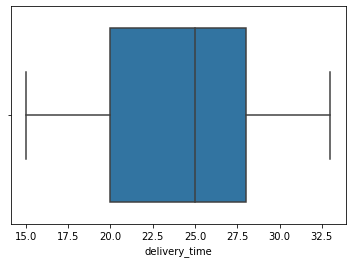

In [ ]:
#graph of delivery_time
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

The average delivery time of an order is 25.0
The minimum time taken to deliver an order is 20 and the maximum time taken to deliver an order is 28.0

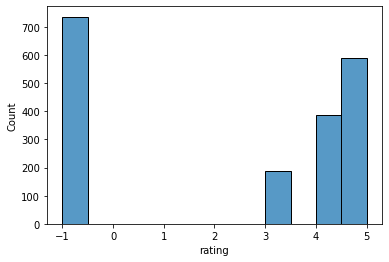

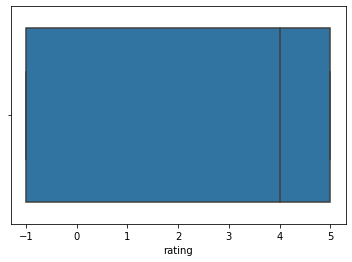

In [ ]:
#graph of rating
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

Most of the orders are not rated.

[Text(0, 0, 'Korean'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'American'),
 Text(0, 0, 'Indian'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Southern'),
 Text(0, 0, 'French'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Vietnamese')]

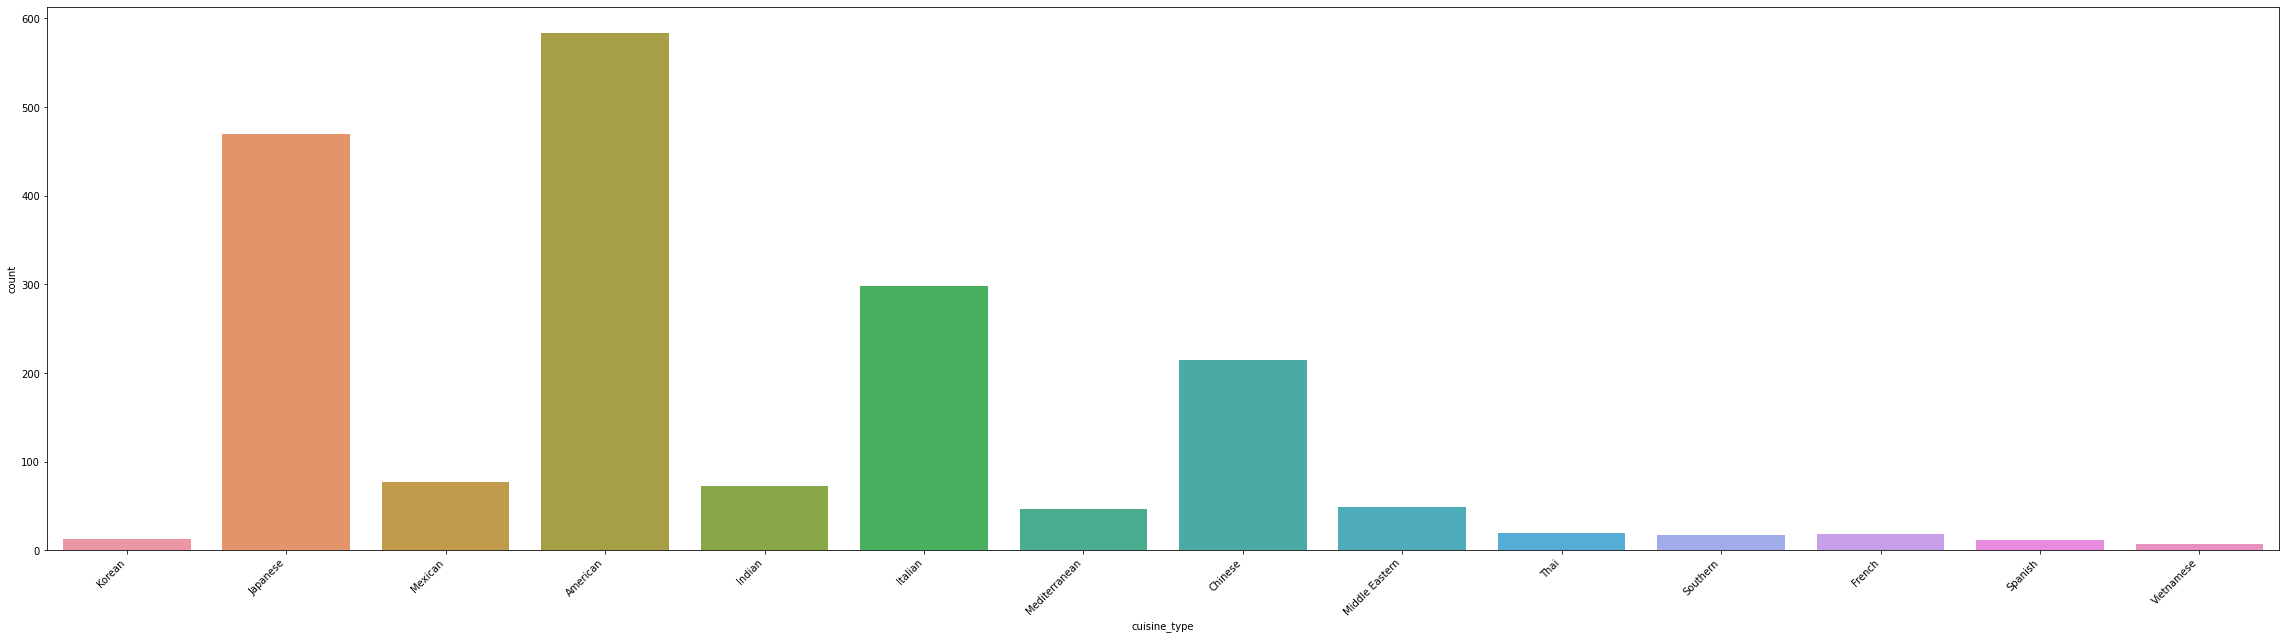

In [ ]:
#graph of cuisine_type
plt.figure(figsize=(40,10))
chart=sns.countplot(data=df,x='cuisine_type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Hangawi'),
 Text(0, 0, 'Blue Ribbon Sushi Izakaya'),
 Text(0, 0, 'Cafe Habana'),
 Text(0, 0, 'Blue Ribbon Fried Chicken'),
 Text(0, 0, 'Dirty Bird to Go'),
 Text(0, 0, 'Tamarind TriBeCa'),
 Text(0, 0, 'The Meatball Shop'),
 Text(0, 0, 'Barbounia'),
 Text(0, 0, 'Anjappar Chettinad'),
 Text(0, 0, 'Bukhara Grill'),
 Text(0, 0, 'Big Wong Restaurant \x8c_¤¾Ñ¼'),
 Text(0, 0, 'Empanada Mama (closed)'),
 Text(0, 0, 'Pylos'),
 Text(0, 0, "Lucky's Famous Burgers"),
 Text(0, 0, 'Shake Shack'),
 Text(0, 0, 'Sushi of Gari'),
 Text(0, 0, 'RedFarm Hudson'),
 Text(0, 0, 'Blue Ribbon Sushi'),
 Text(0, 0, 'Five Guys Burgers and Fries'),
 Text(0, 0, 'Tortaria'),
 Text(0, 0, 'Cafe Mogador'),
 Text(0, 0, 'Otto Enoteca Pizzeria'),
 Text(0, 0, 'Vezzo Thin Crust Pizza'),
 Text(0, 0, 'Sushi of Gari 46'),
 Text(0, 0, 'The Kati Roll Company'),
 Text(0, 0, 'Klong'),
 Text(0, 0, '5 Napkin Burger'),
 Text(0, 0, 'TAO'),
 Text(0, 0, 'Parm'),
 Text(0, 0, 'Sushi Samba'),
 Text(0, 0, 'Haru Gramercy Park'),


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


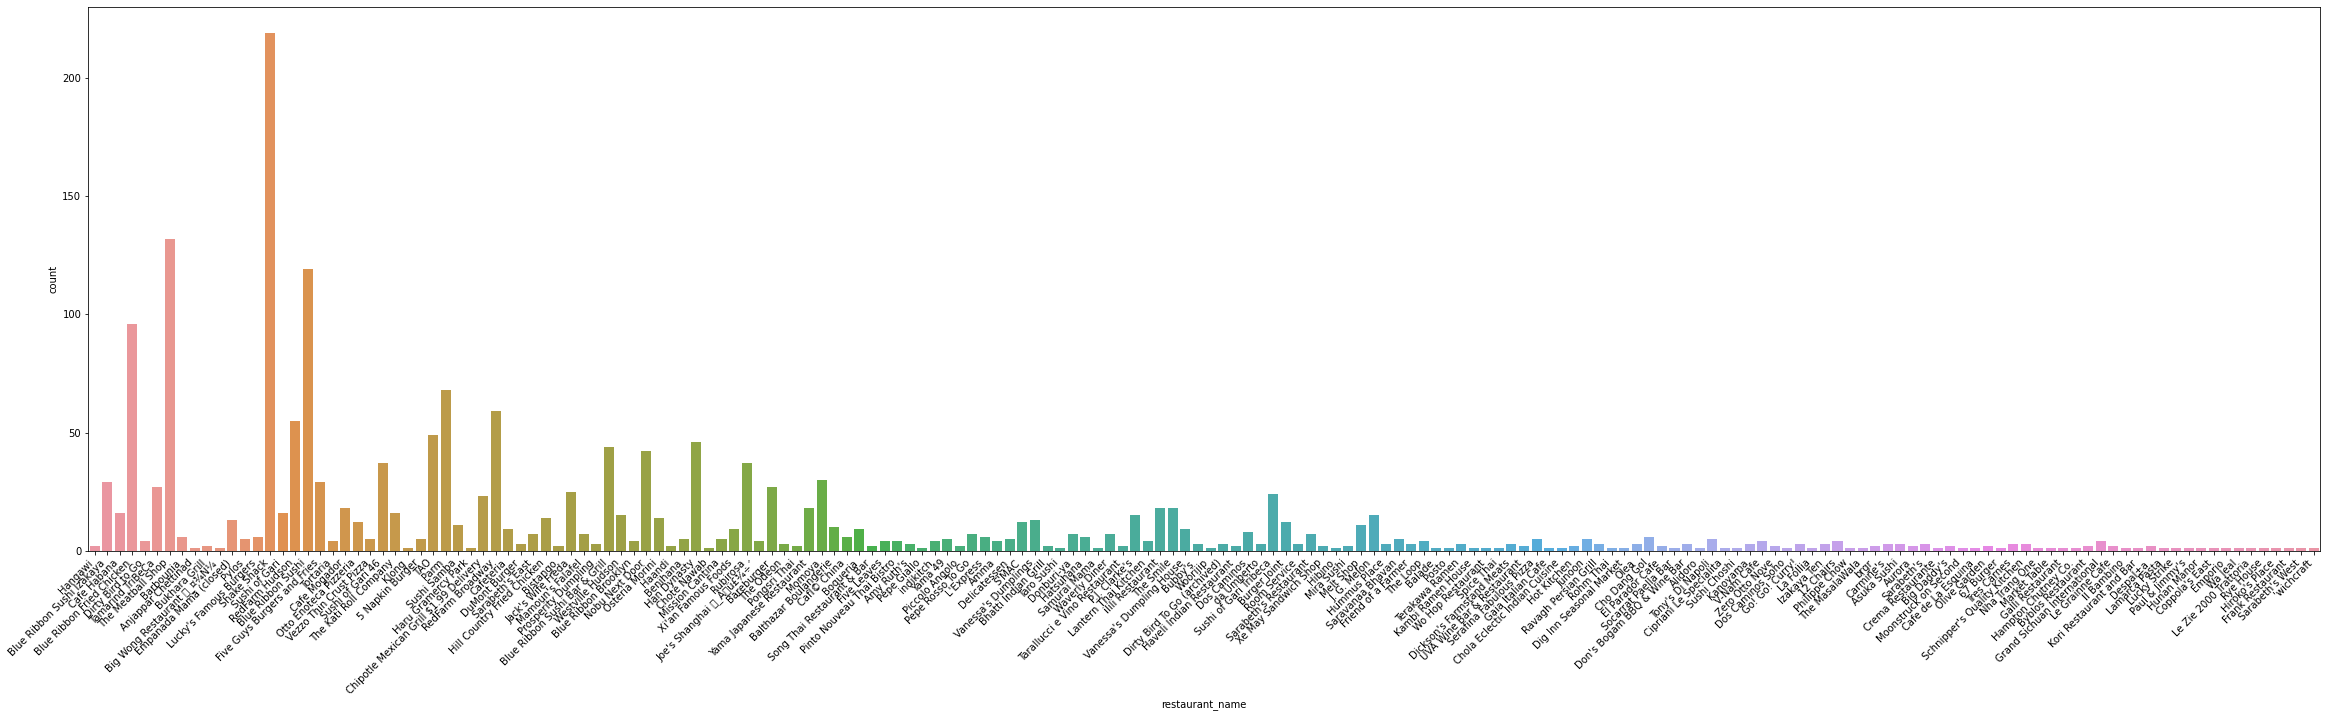

In [ ]:
#graph of restaurant_name
plt.figure(figsize=(40,10))
chart=sns.countplot(data=df,x='restaurant_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Observation:
Most of the orders are for Shake Shack restaurant

[Text(0, 0, 'Weekend'), Text(0, 0, 'Weekday')]

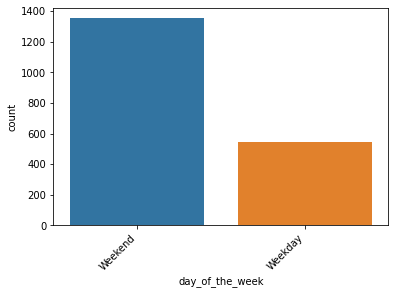

In [ ]:
#graph of day_of_the_week
chart=sns.countplot(data=df,x='day_of_the_week')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Observation:
The number of orders are more during the weekend compared to that of weekday.

[Text(0, 0, 'Korean'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'American'),
 Text(0, 0, 'Indian'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Southern'),
 Text(0, 0, 'French'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Vietnamese')]

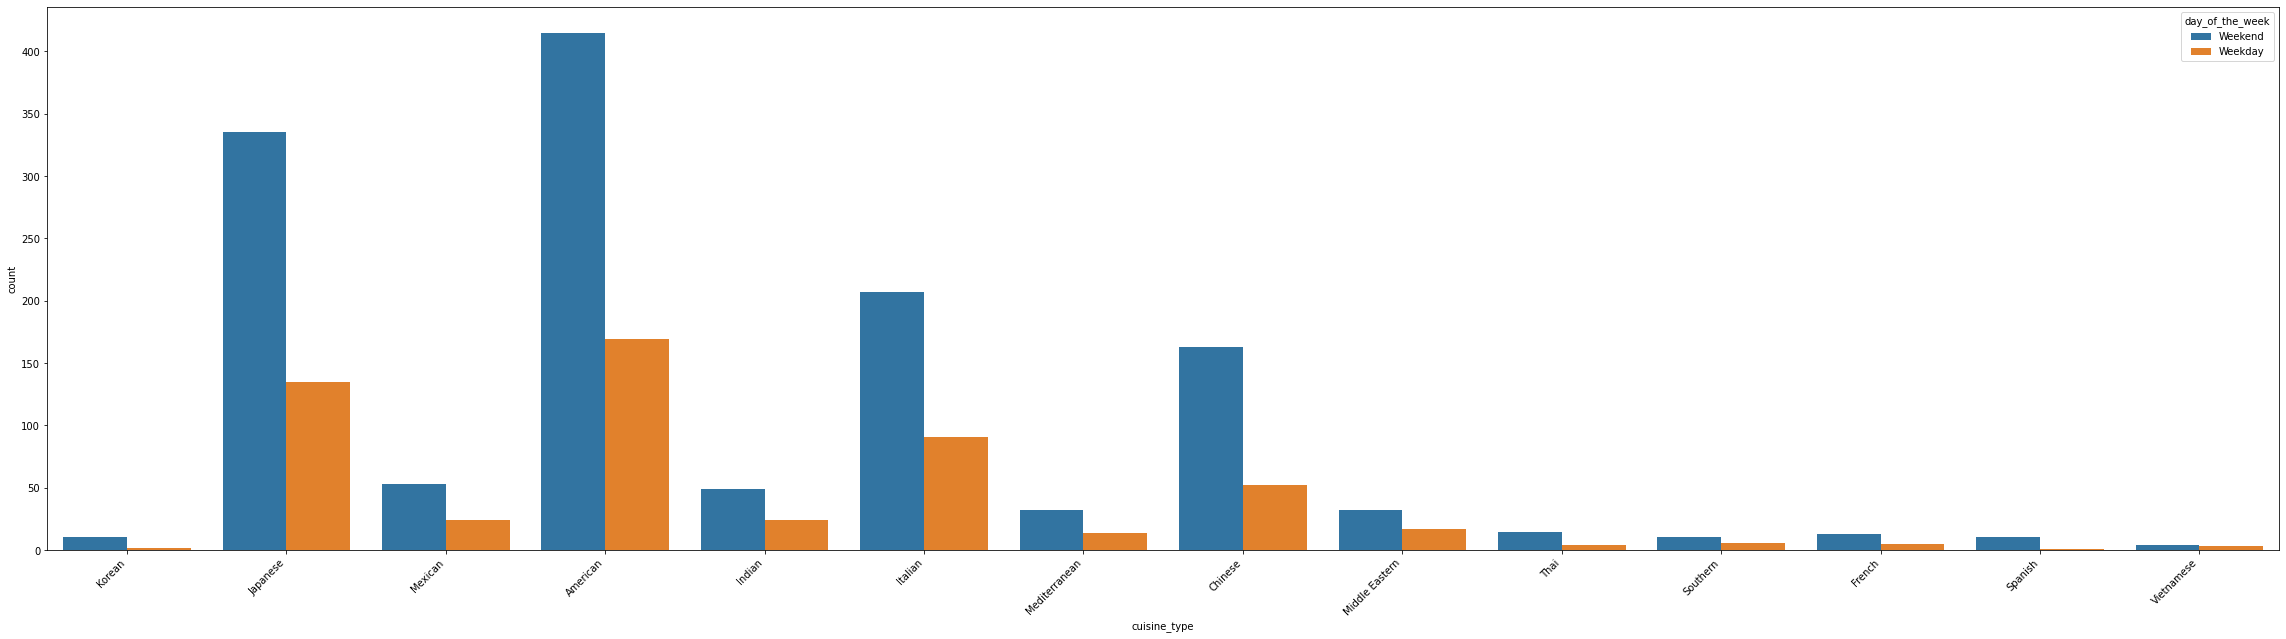

In [ ]:
#graph of cuisine_type with hue= day_of_the_week
plt.figure(figsize=(40,10))
chart=sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Observation:
The American cuisine type is popular both during the weekend as well as weekday.
The japnese stands second.

In [ ]:
#to find the top 5 restaurants based on the number of orders
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()


,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


The top 5 restaurant_name based on the orders received are 

restaurant_name	order_id
0	Shake Shack	219
1	The Meatball Shop	132
2	Blue Ribbon Sushi	119
3	Blue Ribbon Fried Chicken	96
4	Parm	68

[Text(0, 0, 'Hangawi'),
 Text(0, 0, 'Blue Ribbon Sushi Izakaya'),
 Text(0, 0, 'Cafe Habana'),
 Text(0, 0, 'Blue Ribbon Fried Chicken'),
 Text(0, 0, 'Dirty Bird to Go'),
 Text(0, 0, 'Tamarind TriBeCa'),
 Text(0, 0, 'The Meatball Shop'),
 Text(0, 0, 'Barbounia'),
 Text(0, 0, 'Anjappar Chettinad'),
 Text(0, 0, 'Bukhara Grill'),
 Text(0, 0, 'Big Wong Restaurant \x8c_¤¾Ñ¼'),
 Text(0, 0, 'Empanada Mama (closed)'),
 Text(0, 0, 'Pylos'),
 Text(0, 0, "Lucky's Famous Burgers"),
 Text(0, 0, 'Shake Shack'),
 Text(0, 0, 'Sushi of Gari'),
 Text(0, 0, 'RedFarm Hudson'),
 Text(0, 0, 'Blue Ribbon Sushi'),
 Text(0, 0, 'Five Guys Burgers and Fries'),
 Text(0, 0, 'Tortaria'),
 Text(0, 0, 'Cafe Mogador'),
 Text(0, 0, 'Otto Enoteca Pizzeria'),
 Text(0, 0, 'Vezzo Thin Crust Pizza'),
 Text(0, 0, 'Sushi of Gari 46'),
 Text(0, 0, 'The Kati Roll Company'),
 Text(0, 0, 'Klong'),
 Text(0, 0, '5 Napkin Burger'),
 Text(0, 0, 'TAO'),
 Text(0, 0, 'Parm'),
 Text(0, 0, 'Sushi Samba'),
 Text(0, 0, 'Haru Gramercy Park'),


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


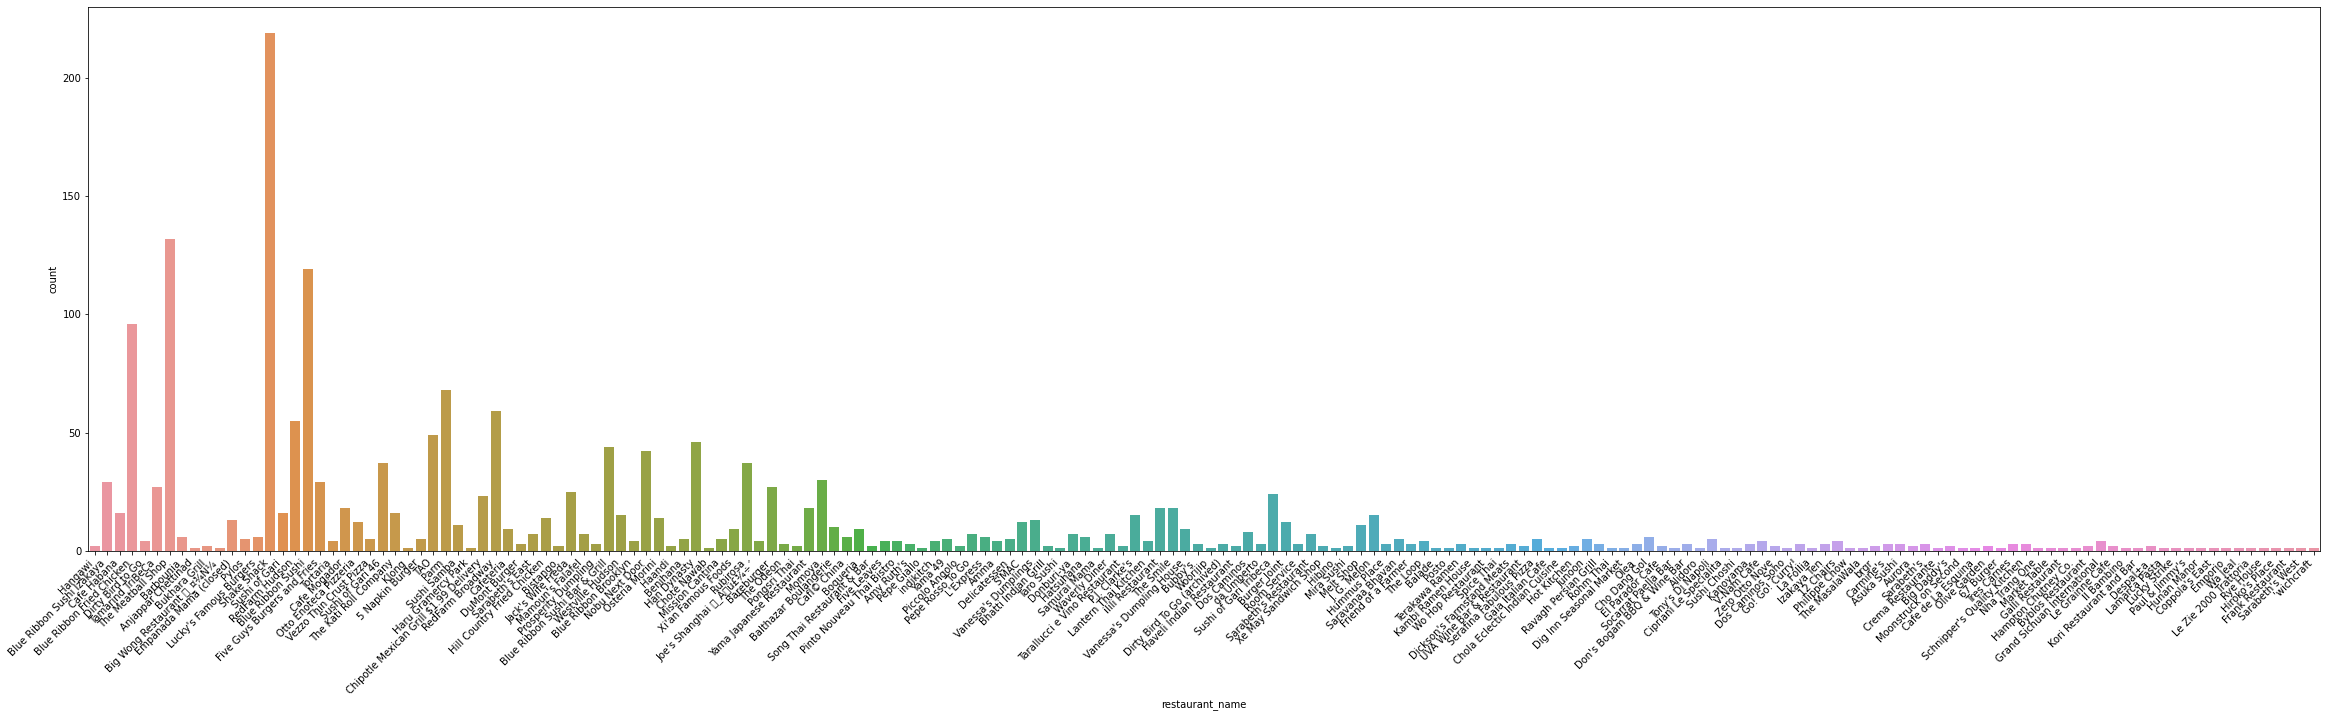

In [ ]:
plt.figure(figsize=(40,10))
chart=sns.countplot(data=df,x='restaurant_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Observations:
The top 5 restaurants which gets the highest number of orders are Shake
 1. Shack	219
 2. The Meatball Shop	132
 3. Blue Ribbon Sushi	119
 4. Blue Ribbon Fried Chicken	96
 5. Parm	68

In [ ]:
# to find most popular cuisine type
fil = (df['day_of_the_week']=='Weekend')
df.loc[fil]['cuisine_type'].value_counts().sort_values(ascending = False).reset_index().head(1)

,index,cuisine_type
0,American,415


[Text(0, 0, 'Korean'),
 Text(0, 0, 'Japanese'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'American'),
 Text(0, 0, 'Indian'),
 Text(0, 0, 'Italian'),
 Text(0, 0, 'Mediterranean'),
 Text(0, 0, 'Chinese'),
 Text(0, 0, 'Middle Eastern'),
 Text(0, 0, 'Thai'),
 Text(0, 0, 'Southern'),
 Text(0, 0, 'French'),
 Text(0, 0, 'Spanish'),
 Text(0, 0, 'Vietnamese')]

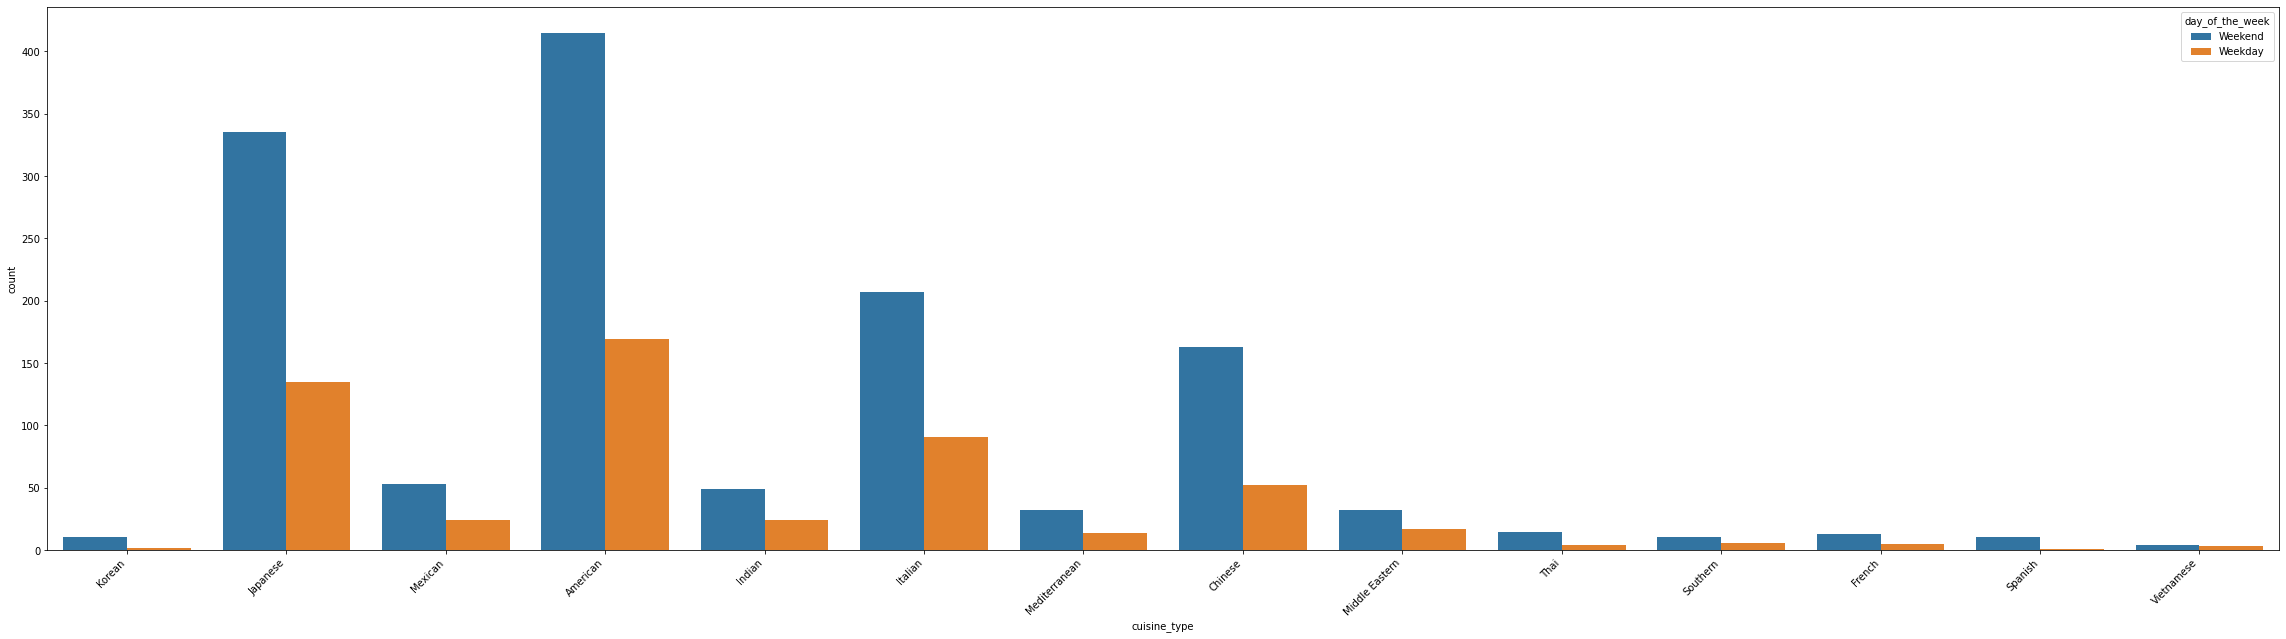

In [ ]:
plt.figure(figsize=(40,10))
chart=sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Observations:
The blue bar shows the number of orders during the weekend for a particular cuisine type and it clearly shows that the American cuisine type is most popular during the weekend.

In [ ]:
#to find the percentage of orders more than 20dollars
orders=df.loc[df['cost_of_the_order']>20,'cost_of_the_order'].count()/df['cost_of_the_order'].count()
orders = orders*100
orders

29.24130663856691

#### Observations:
The percentage of orders that cost more that 20 dollars is 29.24%

In [ ]:
#To find the mean delivery time
df['delivery_time'].mean()

24.161749209694417

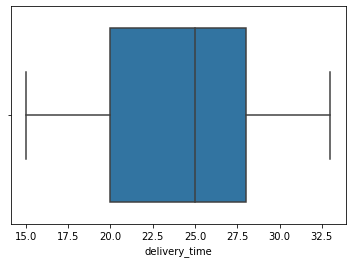

In [ ]:
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
The mean order delivery time is 24.161749209694417

In [ ]:
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending = False).reset_index().head()

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations:
The ID's of the top 5 customers who has placed frequent orders are and the number of times they have ordered are given below.
   customer_id    orders
1. 52832	           13
2. 47440	           10
3. 83287	            9
4. 250494	            8
5. 65009	            7

### Multivariate Analysis

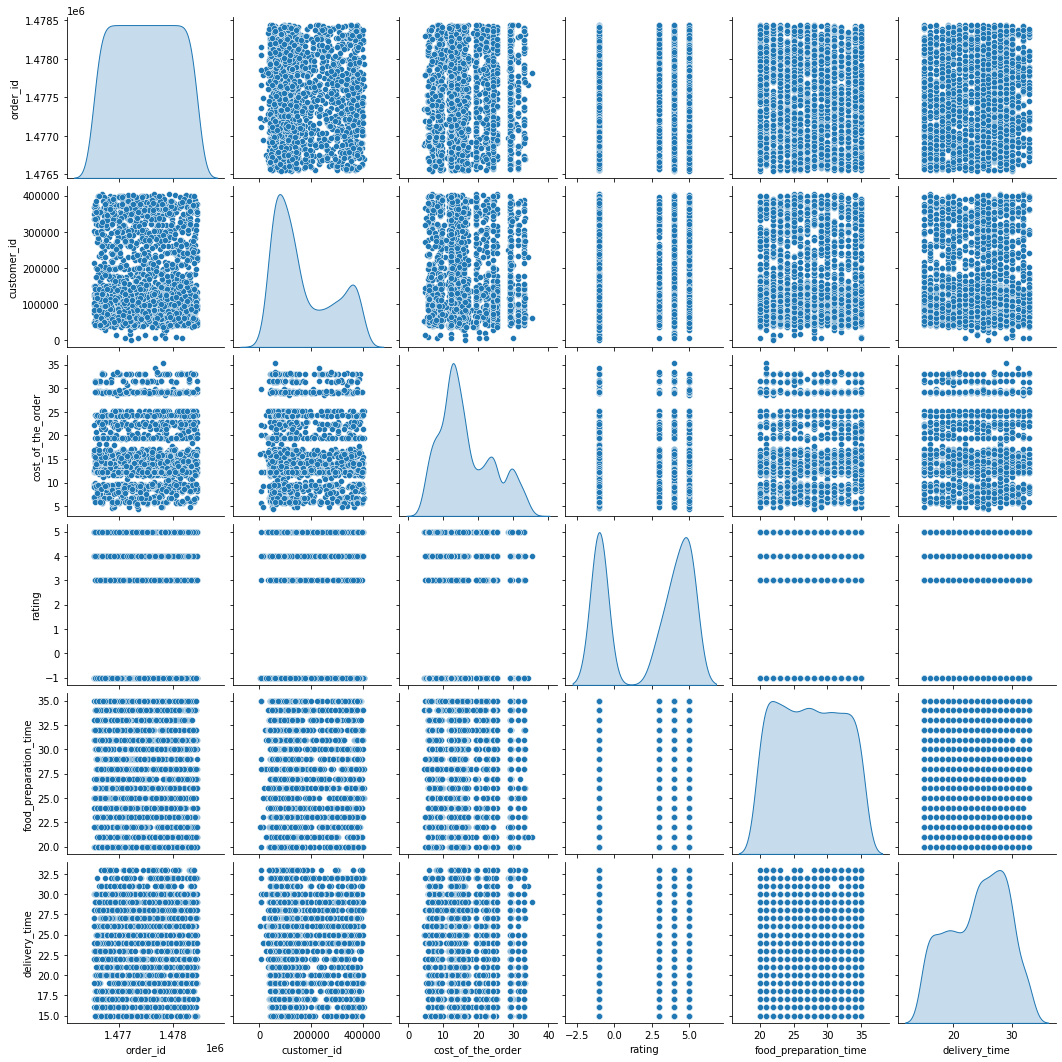

In [ ]:
#pairplot to show the linear relation between the variables
sns.pairplot(df, diag_kind="kde")

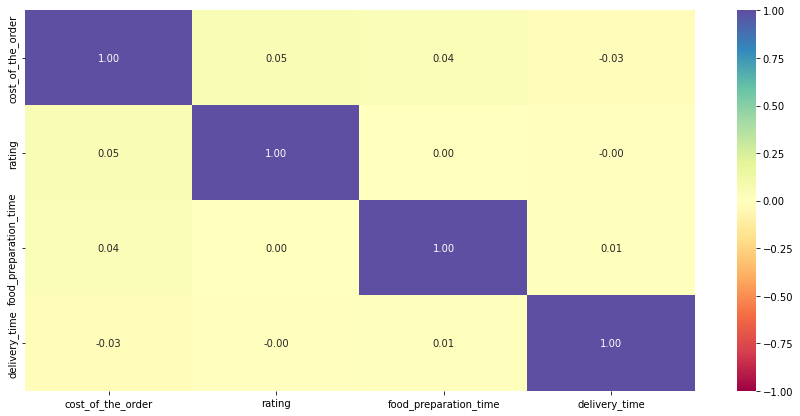

In [ ]:
#heatmap to show the correlation between the variables
lis = ['cost_of_the_order','rating','food_preparation_time', 'delivery_time']
corr = df[lis].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation:
1. There is a negative corelation between the rating and the delivery time that means if the delivery time increases the rating decreases 
2. Delivery time and cost of the order have very less negative correlation.3. Food preparation time and cost of order have very less positive correlation

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


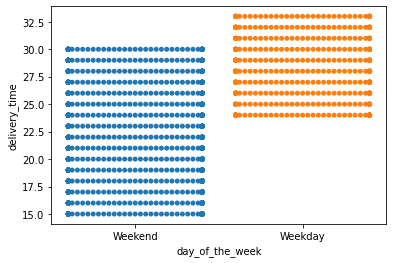

In [ ]:

sns.swarmplot(x="day_of_the_week", y="delivery_time", data=df);

Observation:
The delivery time of an order is more during the weekday compared to that of the weekend.

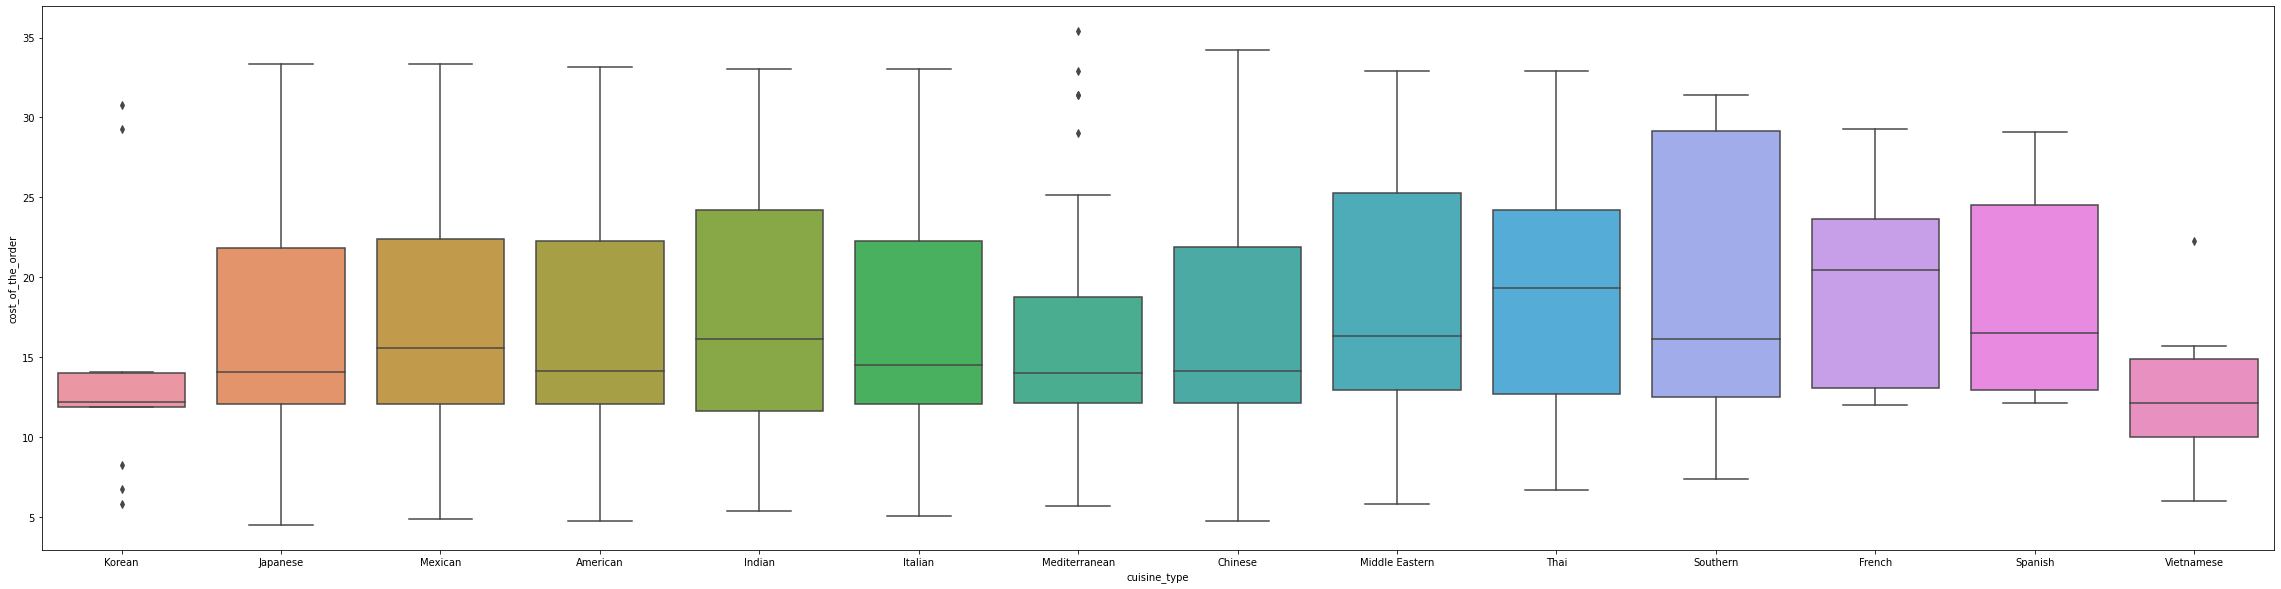

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order');


observation:
vietnamese and korean cuisine types cost less compared to other cuisine types
Outliers are present for the cost of Mediterranean,Korean and Vietnamese cuisine types.
Spanish and French cuisine types are costlier compared to other cuisine types.
The American and chinese restaurant cost average because of which there is high demand for that cuisine type

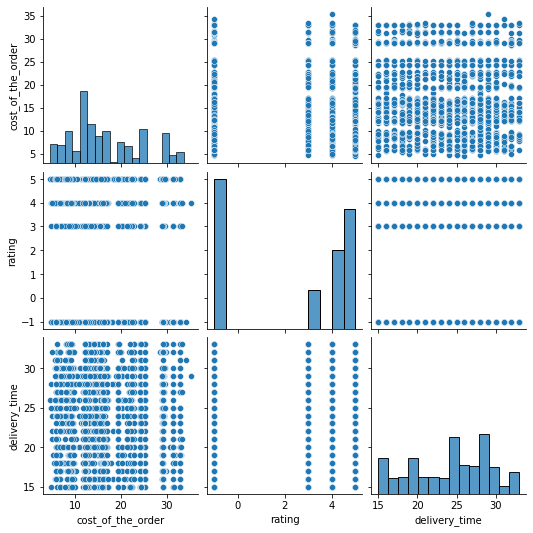

In [ ]:
sns.pairplot(df[['cost_of_the_order','rating','delivery_time']]);

The delivery time is responsible for the low rating of the order
If the cost of the order is more then those orders has been rated and for the cost of the orders which are less then those orders are not rated. 

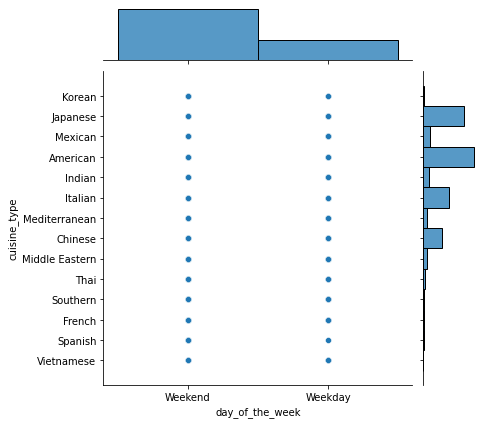

In [ ]:
sns.jointplot(data = df, x = 'day_of_the_week', y = 'cuisine_type');

Ordered received on Weekend is more compared to Weekday.
Weekends resturant received more orders as compare to weekdays.
Most of the orders received for American cusine type, followed by Japnese,Italian, Chinese and Indian

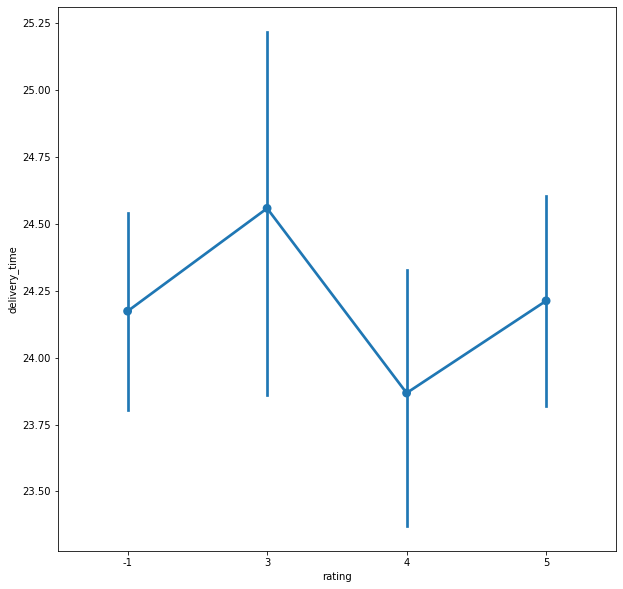

In [ ]:
plt.figure(figsize=(10, 10))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df);

Observation: There is decresase in rating when delivery time is high.

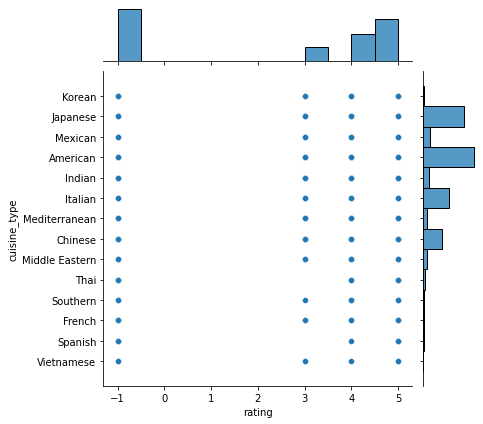

In [ ]:
sns.jointplot(data = df, x = 'rating', y = 'cuisine_type');

1. Most of the orders have not received any ratings.
2. Most of the ratings assigned to orders are 5 and 4.
3. American cusine type received highest ratings.

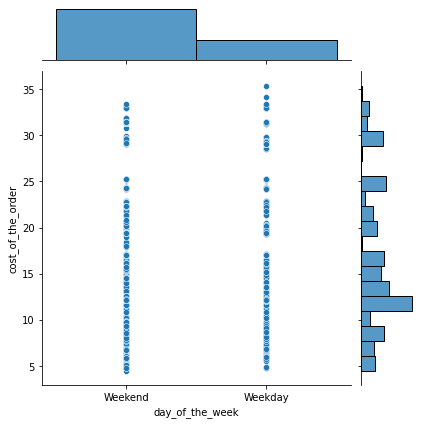

In [ ]:
sns.jointplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order');

1. Most of the orders were placed on weekend.
2. most of the orders that were placed between the cost 10 and 12 dollars.

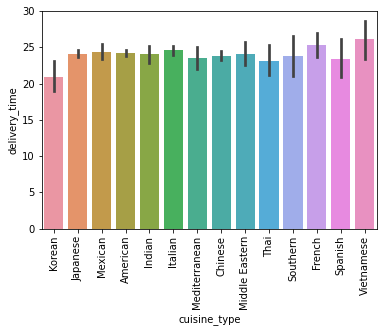

In [ ]:
sns.barplot(data=df,x="cuisine_type", y="delivery_time");
plt.xticks(rotation=90);

observation:
Delivery time of Vietnamese cuisine and French cuisine are longer than other cuisine types.

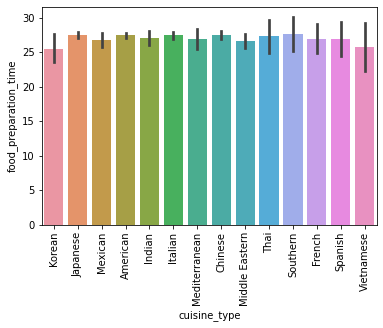

In [ ]:
sns.barplot(data=df,x="cuisine_type", y="food_preparation_time");
plt.xticks(rotation=90);

observation:
Food preparation time of most of the cuisine is between 25 to 30 miniutes

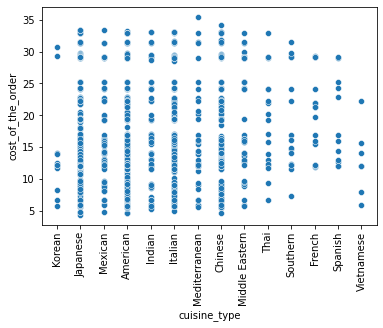

In [ ]:
sns.scatterplot(data=df,y="cost_of_the_order",x="cuisine_type");
plt.xticks(rotation=90);

observation:
1. The scatter plot shows that the cost of American and Chinese cuisine is between 5 and 35 dollars
2. French cuisine cost between 10 and 30 dollars
3. Mediterranean cuisine cost more than 35 dollars

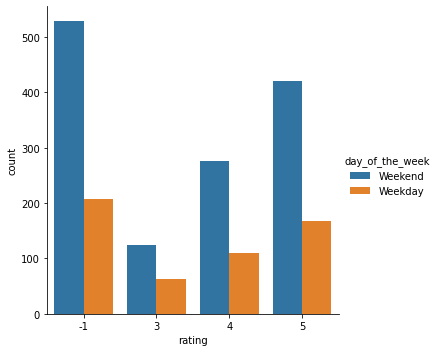

In [ ]:
sns.catplot(x="rating",hue="day_of_the_week",data=df,kind="count");

Observations:
The ratings are given during the weekends compared to that of weekdays.

In [ ]:
#total count of the ratings for particular restaurants
tot_count = df.groupby(['restaurant_name'])['rating'].count().reset_index()
#to check if total count is greater than 50
tot_count_50 = tot_count[tot_count['rating']>50]['restaurant_name']
#to calculate the average value of rating per restaurants
average_count = tot_count.groupby(['restaurant_name'])['rating'].mean().reset_index()
#to check if the average rating is greater than 4
average_count_4= average_count[average_count['rating']>4]
#to club both results
average_count_4[average_count_4['restaurant_name'].isin(tot_count_50)].sort_values(by='rating',ascending = False).reset_index()

,index,restaurant_name,rating
0,136,Shake Shack,219.0
1,153,The Meatball Shop,132.0
2,21,Blue Ribbon Sushi,119.0
3,20,Blue Ribbon Fried Chicken,96.0
4,109,Parm,68.0
5,121,RedFarm Broadway,59.0
6,122,RedFarm Hudson,55.0


Observations:
The restaurants which are can avail the promotional offers are
1 Shake Shack	
2	The Meatball Shop	
3	Blue Ribbon Sushi	
4	Blue Ribbon Fried Chicken	
5	Parm	
6	RedFarm Broadway	
7	RedFarm Hudson	

In [ ]:
#to calculate the total revenue generated by the company
revenue=0.00
for i in df['cost_of_the_order']:
  if i >20.00:
    revenue = (i*0.25)+revenue
  elif i>5.00:
    revenue = (i*0.15)+revenue
print(revenue)


6166.302999999994


#### Observations:
The totalrevenue generated by the company for the orders above 20 and 5 dollars is 6166.302999999994 dollars

In [ ]:
#to check the percentage of orders that took more than 60min of time to deliver the order.
count=0
for i in range(df['delivery_time'].count()):
  prep_time = df['food_preparation_time'].loc[df.index[i]]
  del_time = df['delivery_time'].loc[df.index[i]]
  tot_time = prep_time+del_time
  if tot_time>60:
    count = count+1
percentage = count/df['delivery_time'].count()
print(percentage*100)


10.537407797681771


In [ ]:
#the below code can also be used to find the result
df['total_time'] = df['food_preparation_time'] + df['delivery_time'].copy()
delivery_time_60 = df.loc[(df['total_time'] > 60)]['total_time']
time_more_than_60 = delivery_time_60.count()
total_order = df['total_time'].count()
order_percentage = (time_more_than_60/total_order)*100
order_percentage

10.537407797681771

#### Observations:
10.54% of the orders take more than 60 minutes to deliver the order.

In [ ]:
fil = (df['day_of_the_week']=='Weekend')
print('The mean delivery time during the weekday is',df.loc[fil]['delivery_time'].mean())
fil = (df['day_of_the_week']=='Weekday')
print('The mean delivery time during the weekend is',df.loc[fil]['delivery_time'].mean())


The mean delivery time during the weekday is 22.4700222057735
The mean delivery time during the weekend is 28.340036563071298


#### Observations:
The delivery time during the weekday is less compared to that of the weekend because the number of orders are more during the weekend than that of the weekday.

### Conclusion and Recommendations

### Conclusions:

1. American cusine type is the most popular cuisine type, followed by Japanese and Chinese cuisine type. 
2.  Total of 736 out of 1898 orders were not rated.  
3. Minimum cost of the order is 4.47 and maximum cost of order is 35.41 dollars.
4. The average time taken to deliver the food on weekdays is more compared to that of weekends. 
5. Time taken to prepare the food once the order is placed is between 20.00 mins and is 35.41 mins
6. Most of the orderes were placed on weekend than on weekdays.   
7. total revenue generated by the company is 6166.30 dollars  
8. There are total 178 resturant and popular resturant is Shake Shack.
9. Most expensive cuisine type is French Cuisine.
10. The rating is dependent on delivery time if the delivery time is more then the rating is less.

### Recommendations:

1. The company must provide offers to restaurants which serves American, Japanese, Italian and Chinese cuisine types as these cuisine types are very popular.
2. The company must provide offers to restaurants like Shake Shack which gets most of the orders.
3. As the orders are more during the weekends, number of delivery persons should be placed during the weekends to makesure the orders are delivered on time. 
4. Rating is a very important factor to gauge customer satisfaction. The company should find out the reason behind the low count of ratings. 
5. The customer rating is dependent on the delivery time hence the company should make sure the orders are delivered on time where the customer will be satisfied with the order and he will make sure to reorder again.
6. The restaurants must  give some offers to customers to attract them during the weekdays.

---